In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.reset_default_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

display(f)

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
print(sess.run(f))
sess.close()

42


In [4]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

result

42

In [5]:
init = tf.global_variables_initializer()

with tf.Session():
    init.run()
    result = f.eval()

result

42

In [6]:
init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
init.run()
result = f.eval()
sess.close()

result

42

# Managing graphs

In [7]:
tf.reset_default_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [8]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is tf.get_default_graph()

False

In [9]:
x2.graph is graph

True

In [10]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [11]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15


# Linear Regression with TensorFlow

In [12]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

In [13]:
tf.reset_default_graph()
#display(housing.target.shape)
X = tf.constant(housing_data_plus_bias, dtype=tf.float64, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float64, name="y")
#display(y.shape)
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    result = theta.eval()

print(result)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


# Perceptron

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [15]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

/home/johan/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1])

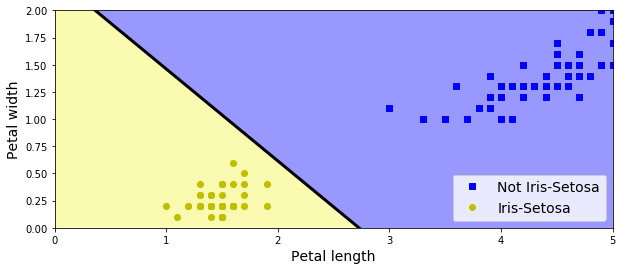

In [16]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

# Tf.learn

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_eval_distribute': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_evaluation_master': '', '_session_config': None, '

INFO:tensorflow:loss = 0.35075334, step = 301 (0.438 sec)
INFO:tensorflow:global_step/sec: 211.716
INFO:tensorflow:loss = 0.21024808, step = 401 (0.480 sec)
INFO:tensorflow:global_step/sec: 222.394
INFO:tensorflow:loss = 0.23975565, step = 501 (0.442 sec)
INFO:tensorflow:global_step/sec: 243.434
INFO:tensorflow:loss = 0.09992624, step = 601 (0.413 sec)
INFO:tensorflow:global_step/sec: 230.882
INFO:tensorflow:loss = 0.14753538, step = 701 (0.433 sec)
INFO:tensorflow:global_step/sec: 256.829
INFO:tensorflow:loss = 0.22863413, step = 801 (0.387 sec)
INFO:tensorflow:global_step/sec: 232.264
INFO:tensorflow:loss = 0.09326728, step = 901 (0.430 sec)
INFO:tensorflow:global_step/sec: 214.646
INFO:tensorflow:loss = 0.19901502, step = 1001 (0.468 sec)
INFO:tensorflow:global_step/sec: 206.034
INFO:tensorflow:loss = 0.15857285, step = 1101 (0.484 sec)
INFO:tensorflow:global_step/sec: 238.646
INFO:tensorflow:loss = 0.16822384, step = 1201 (0.419 sec)
INFO:tensorflow:global_step/sec: 242.751
INFO:te

INFO:tensorflow:loss = 0.008679375, step = 8501 (0.402 sec)
INFO:tensorflow:global_step/sec: 226.45
INFO:tensorflow:loss = 0.006274122, step = 8601 (0.440 sec)
INFO:tensorflow:global_step/sec: 225.181
INFO:tensorflow:loss = 0.0028147108, step = 8701 (0.444 sec)
INFO:tensorflow:global_step/sec: 253.035
INFO:tensorflow:loss = 0.010083812, step = 8801 (0.395 sec)
INFO:tensorflow:global_step/sec: 263.565
INFO:tensorflow:loss = 0.0053417017, step = 8901 (0.380 sec)
INFO:tensorflow:global_step/sec: 222.41
INFO:tensorflow:loss = 0.0071083857, step = 9001 (0.450 sec)
INFO:tensorflow:global_step/sec: 183.977
INFO:tensorflow:loss = 0.0072161024, step = 9101 (0.544 sec)
INFO:tensorflow:global_step/sec: 233.218
INFO:tensorflow:loss = 0.0077031995, step = 9201 (0.429 sec)
INFO:tensorflow:global_step/sec: 285.149
INFO:tensorflow:loss = 0.005926846, step = 9301 (0.351 sec)
INFO:tensorflow:global_step/sec: 212.994
INFO:tensorflow:loss = 0.02339757, step = 9401 (0.469 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 284.39
INFO:tensorflow:loss = 0.0015002254, step = 16601 (0.352 sec)
INFO:tensorflow:global_step/sec: 255.172
INFO:tensorflow:loss = 0.0020823227, step = 16701 (0.392 sec)
INFO:tensorflow:global_step/sec: 273.979
INFO:tensorflow:loss = 0.0025836546, step = 16801 (0.365 sec)
INFO:tensorflow:global_step/sec: 254.185
INFO:tensorflow:loss = 0.0026972843, step = 16901 (0.394 sec)
INFO:tensorflow:global_step/sec: 280.339
INFO:tensorflow:loss = 0.005614063, step = 17001 (0.358 sec)
INFO:tensorflow:global_step/sec: 289.498
INFO:tensorflow:loss = 0.001411001, step = 17101 (0.344 sec)
INFO:tensorflow:global_step/sec: 281.739
INFO:tensorflow:loss = 0.0020428996, step = 17201 (0.355 sec)
INFO:tensorflow:global_step/sec: 276.707
INFO:tensorflow:loss = 0.0013227065, step = 17301 (0.361 sec)
INFO:tensorflow:global_step/sec: 289.03
INFO:tensorflow:loss = 0.0013461482, step = 17401 (0.346 sec)
INFO:tensorflow:global_step/sec: 281.74
INFO:tensorflow:loss = 0.0012351384, 

INFO:tensorflow:global_step/sec: 223.277
INFO:tensorflow:loss = 0.0003662879, step = 24601 (0.449 sec)
INFO:tensorflow:global_step/sec: 213.334
INFO:tensorflow:loss = 0.0012124379, step = 24701 (0.466 sec)
INFO:tensorflow:global_step/sec: 167.98
INFO:tensorflow:loss = 0.0022244754, step = 24801 (0.597 sec)
INFO:tensorflow:global_step/sec: 160.117
INFO:tensorflow:loss = 0.00242559, step = 24901 (0.623 sec)
INFO:tensorflow:global_step/sec: 177.985
INFO:tensorflow:loss = 0.00031806625, step = 25001 (0.562 sec)
INFO:tensorflow:global_step/sec: 186.374
INFO:tensorflow:loss = 0.00072287425, step = 25101 (0.539 sec)
INFO:tensorflow:global_step/sec: 182.967
INFO:tensorflow:loss = 0.0015482337, step = 25201 (0.544 sec)
INFO:tensorflow:global_step/sec: 214.811
INFO:tensorflow:loss = 0.00020364944, step = 25301 (0.466 sec)
INFO:tensorflow:global_step/sec: 202.702
INFO:tensorflow:loss = 0.000522089, step = 25401 (0.496 sec)
INFO:tensorflow:global_step/sec: 236.5
INFO:tensorflow:loss = 0.0013844854

INFO:tensorflow:loss = 0.00051452545, step = 32501 (0.349 sec)
INFO:tensorflow:global_step/sec: 267.085
INFO:tensorflow:loss = 0.00023567291, step = 32601 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.369
INFO:tensorflow:loss = 0.0012093498, step = 32701 (0.378 sec)
INFO:tensorflow:global_step/sec: 222.357
INFO:tensorflow:loss = 0.0009868072, step = 32801 (0.453 sec)
INFO:tensorflow:global_step/sec: 275.332
INFO:tensorflow:loss = 0.00039283276, step = 32901 (0.360 sec)
INFO:tensorflow:global_step/sec: 279.251
INFO:tensorflow:loss = 0.00052935036, step = 33001 (0.358 sec)
INFO:tensorflow:global_step/sec: 251.802
INFO:tensorflow:loss = 0.0017476301, step = 33101 (0.397 sec)
INFO:tensorflow:global_step/sec: 271.817
INFO:tensorflow:loss = 0.0012313594, step = 33201 (0.368 sec)
INFO:tensorflow:global_step/sec: 286.863
INFO:tensorflow:loss = 0.0002867366, step = 33301 (0.350 sec)
INFO:tensorflow:global_step/sec: 282.311
INFO:tensorflow:loss = 0.0010647427, step = 33401 (0.353 sec)
INFO:te

DNNClassifier(params={'embedding_lr_multipliers': None, 'hidden_units': [300, 100], 'gradient_clip_norm': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'dropout': None, 'activation_fn': <function relu at 0x7fb5ab336ae8>, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fb5880a3208>, 'optimizer': None, 'input_layer_min_slice_size': None})

In [19]:
#plt.imshow(X_train[0])
display(X_train.shape)
display(feature_columns[0][0])

(55000, 784)

''

In [20]:
# RUnning on the test set:
from sklearn.metrics import accuracy_score
y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbehmil2r/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.982

# Training a DNN (Plain TensorFlow)

In [21]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        #f.nn.sparse_softmax_cross_entropy_with_log
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [22]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            #display(X_batch)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        #print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [28]:
#n_epochs = 20
n_epochs = 5
batch_size = 50
Dtraining = tf.data.Dataset.from_tensor_slices((X_train,y_train))
Dtraining = Dtraining.batch(batch_size)
#iterator = dataset.make_initializable_iterator()
iterator = Dtraining.make_initializable_iterator()
Xy = iterator.get_next()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(iterator.initializer)
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = sess.run(Xy)
            #X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
            print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.06 Test accuracy: 0.0856
0 Train accuracy: 0.06 Test accuracy: 0.0866
0 Train accuracy: 0.08 Test accuracy: 0.088
0 Train accuracy: 0.08 Test accuracy: 0.0876
0 Train accuracy: 0.14 Test accuracy: 0.0897
0 Train accuracy: 0.08 Test accuracy: 0.0907
0 Train accuracy: 0.1 Test accuracy: 0.0915
0 Train accuracy: 0.12 Test accuracy: 0.0917
0 Train accuracy: 0.04 Test accuracy: 0.0933
0 Train accuracy: 0.1 Test accuracy: 0.0938
0 Train accuracy: 0.14 Test accuracy: 0.0952
0 Train accuracy: 0.2 Test accuracy: 0.0973
0 Train accuracy: 0.12 Test accuracy: 0.0998
0 Train accuracy: 0.16 Test accuracy: 0.1022
0 Train accuracy: 0.18 Test accuracy: 0.1021
0 Train accuracy: 0.06 Test accuracy: 0.1035
0 Train accuracy: 0.12 Test accuracy: 0.1064
0 Train accuracy: 0.16 Test accuracy: 0.1081
0 Train accuracy: 0.16 Test accuracy: 0.1101
0 Train accuracy: 0.12 Test accuracy: 0.1149
0 Train accuracy: 0.12 Test accuracy: 0.1197
0 Train accuracy: 0.1 Test accuracy: 0.1196
0 Train accurac

0 Train accuracy: 0.62 Test accuracy: 0.7165
0 Train accuracy: 0.66 Test accuracy: 0.7161
0 Train accuracy: 0.72 Test accuracy: 0.7109
0 Train accuracy: 0.56 Test accuracy: 0.7172
0 Train accuracy: 0.7 Test accuracy: 0.7144
0 Train accuracy: 0.74 Test accuracy: 0.7158
0 Train accuracy: 0.66 Test accuracy: 0.7232
0 Train accuracy: 0.76 Test accuracy: 0.72
0 Train accuracy: 0.58 Test accuracy: 0.7234
0 Train accuracy: 0.58 Test accuracy: 0.724
0 Train accuracy: 0.54 Test accuracy: 0.7227
0 Train accuracy: 0.62 Test accuracy: 0.7246
0 Train accuracy: 0.72 Test accuracy: 0.7264
0 Train accuracy: 0.78 Test accuracy: 0.7273
0 Train accuracy: 0.68 Test accuracy: 0.7287
0 Train accuracy: 0.7 Test accuracy: 0.7307
0 Train accuracy: 0.74 Test accuracy: 0.732
0 Train accuracy: 0.7 Test accuracy: 0.7366
0 Train accuracy: 0.64 Test accuracy: 0.7379
0 Train accuracy: 0.74 Test accuracy: 0.7314
0 Train accuracy: 0.76 Test accuracy: 0.7315
0 Train accuracy: 0.68 Test accuracy: 0.7353
0 Train accuracy:

0 Train accuracy: 0.9 Test accuracy: 0.8094
0 Train accuracy: 0.8 Test accuracy: 0.8061
0 Train accuracy: 0.8 Test accuracy: 0.8103
0 Train accuracy: 0.82 Test accuracy: 0.8087
0 Train accuracy: 0.84 Test accuracy: 0.8122
0 Train accuracy: 0.8 Test accuracy: 0.8102
0 Train accuracy: 0.74 Test accuracy: 0.8149
0 Train accuracy: 0.76 Test accuracy: 0.8098
0 Train accuracy: 0.84 Test accuracy: 0.809
0 Train accuracy: 0.8 Test accuracy: 0.8115
0 Train accuracy: 0.8 Test accuracy: 0.8144
0 Train accuracy: 0.76 Test accuracy: 0.8113
0 Train accuracy: 0.86 Test accuracy: 0.8109
0 Train accuracy: 0.86 Test accuracy: 0.8137
0 Train accuracy: 0.86 Test accuracy: 0.8127
0 Train accuracy: 0.8 Test accuracy: 0.8149
0 Train accuracy: 0.78 Test accuracy: 0.8109
0 Train accuracy: 0.76 Test accuracy: 0.807
0 Train accuracy: 0.8 Test accuracy: 0.8109
0 Train accuracy: 0.8 Test accuracy: 0.8085
0 Train accuracy: 0.8 Test accuracy: 0.8077
0 Train accuracy: 0.76 Test accuracy: 0.8094
0 Train accuracy: 0.82

0 Train accuracy: 0.84 Test accuracy: 0.8484
0 Train accuracy: 0.88 Test accuracy: 0.8512
0 Train accuracy: 0.84 Test accuracy: 0.8532
0 Train accuracy: 0.9 Test accuracy: 0.8523
0 Train accuracy: 0.94 Test accuracy: 0.8532
0 Train accuracy: 0.9 Test accuracy: 0.8533
0 Train accuracy: 0.88 Test accuracy: 0.8514
0 Train accuracy: 0.86 Test accuracy: 0.8519
0 Train accuracy: 0.78 Test accuracy: 0.8525
0 Train accuracy: 0.82 Test accuracy: 0.8508
0 Train accuracy: 0.9 Test accuracy: 0.8446
0 Train accuracy: 0.78 Test accuracy: 0.8454
0 Train accuracy: 0.92 Test accuracy: 0.8476
0 Train accuracy: 0.82 Test accuracy: 0.8473
0 Train accuracy: 0.78 Test accuracy: 0.8415
0 Train accuracy: 0.8 Test accuracy: 0.8431
0 Train accuracy: 0.84 Test accuracy: 0.8435
0 Train accuracy: 0.86 Test accuracy: 0.8442
0 Train accuracy: 0.92 Test accuracy: 0.8449
0 Train accuracy: 0.88 Test accuracy: 0.8457
0 Train accuracy: 0.88 Test accuracy: 0.846
0 Train accuracy: 0.92 Test accuracy: 0.8467
0 Train accurac

0 Train accuracy: 0.94 Test accuracy: 0.8549
0 Train accuracy: 0.9 Test accuracy: 0.8571
0 Train accuracy: 0.84 Test accuracy: 0.8558
0 Train accuracy: 0.84 Test accuracy: 0.8578
0 Train accuracy: 0.86 Test accuracy: 0.8547
0 Train accuracy: 0.8 Test accuracy: 0.8558
0 Train accuracy: 0.86 Test accuracy: 0.8516
0 Train accuracy: 0.8 Test accuracy: 0.8519
0 Train accuracy: 0.82 Test accuracy: 0.8485
0 Train accuracy: 0.7 Test accuracy: 0.8524
0 Train accuracy: 0.74 Test accuracy: 0.8589
0 Train accuracy: 0.82 Test accuracy: 0.8604
0 Train accuracy: 0.82 Test accuracy: 0.8631
0 Train accuracy: 0.8 Test accuracy: 0.8653
0 Train accuracy: 0.96 Test accuracy: 0.8675
0 Train accuracy: 0.88 Test accuracy: 0.869
0 Train accuracy: 0.82 Test accuracy: 0.8706
0 Train accuracy: 0.94 Test accuracy: 0.8688
0 Train accuracy: 0.86 Test accuracy: 0.8681
0 Train accuracy: 0.88 Test accuracy: 0.8706
0 Train accuracy: 0.8 Test accuracy: 0.8679
0 Train accuracy: 0.84 Test accuracy: 0.8679
0 Train accuracy:

0 Train accuracy: 0.9 Test accuracy: 0.8745
0 Train accuracy: 0.82 Test accuracy: 0.8761
0 Train accuracy: 0.82 Test accuracy: 0.8779
0 Train accuracy: 0.86 Test accuracy: 0.8769
0 Train accuracy: 0.82 Test accuracy: 0.8749
0 Train accuracy: 0.92 Test accuracy: 0.8721
0 Train accuracy: 0.92 Test accuracy: 0.8737
0 Train accuracy: 0.96 Test accuracy: 0.8724
0 Train accuracy: 0.86 Test accuracy: 0.8745
0 Train accuracy: 0.92 Test accuracy: 0.875
0 Train accuracy: 0.92 Test accuracy: 0.8767
0 Train accuracy: 0.9 Test accuracy: 0.8784
0 Train accuracy: 0.92 Test accuracy: 0.8794
0 Train accuracy: 0.94 Test accuracy: 0.8785
0 Train accuracy: 0.88 Test accuracy: 0.8779
0 Train accuracy: 0.92 Test accuracy: 0.8781
0 Train accuracy: 0.9 Test accuracy: 0.8775
0 Train accuracy: 0.82 Test accuracy: 0.8786
0 Train accuracy: 0.88 Test accuracy: 0.8785
0 Train accuracy: 0.8 Test accuracy: 0.8779
0 Train accuracy: 0.74 Test accuracy: 0.8757
0 Train accuracy: 0.8 Test accuracy: 0.8752
0 Train accuracy

1 Train accuracy: 0.84 Test accuracy: 0.8845
1 Train accuracy: 0.86 Test accuracy: 0.8845
1 Train accuracy: 0.92 Test accuracy: 0.8847
1 Train accuracy: 0.94 Test accuracy: 0.885
1 Train accuracy: 0.86 Test accuracy: 0.8829
1 Train accuracy: 0.9 Test accuracy: 0.8822
1 Train accuracy: 0.84 Test accuracy: 0.8832
1 Train accuracy: 0.86 Test accuracy: 0.8843
1 Train accuracy: 0.84 Test accuracy: 0.882
1 Train accuracy: 0.92 Test accuracy: 0.8841
1 Train accuracy: 0.88 Test accuracy: 0.8839
1 Train accuracy: 0.84 Test accuracy: 0.8851
1 Train accuracy: 0.94 Test accuracy: 0.885
1 Train accuracy: 0.94 Test accuracy: 0.8862
1 Train accuracy: 0.98 Test accuracy: 0.8855
1 Train accuracy: 0.9 Test accuracy: 0.8851
1 Train accuracy: 0.92 Test accuracy: 0.884
1 Train accuracy: 0.92 Test accuracy: 0.884
1 Train accuracy: 0.92 Test accuracy: 0.8851
1 Train accuracy: 0.82 Test accuracy: 0.8834
1 Train accuracy: 0.92 Test accuracy: 0.881
1 Train accuracy: 0.96 Test accuracy: 0.8829
1 Train accuracy: 

1 Train accuracy: 0.84 Test accuracy: 0.8933
1 Train accuracy: 0.92 Test accuracy: 0.8906
1 Train accuracy: 0.82 Test accuracy: 0.8919
1 Train accuracy: 0.84 Test accuracy: 0.8927
1 Train accuracy: 0.8 Test accuracy: 0.8908
1 Train accuracy: 0.78 Test accuracy: 0.8915
1 Train accuracy: 0.78 Test accuracy: 0.8923
1 Train accuracy: 0.9 Test accuracy: 0.8931
1 Train accuracy: 0.88 Test accuracy: 0.893
1 Train accuracy: 0.86 Test accuracy: 0.8929
1 Train accuracy: 1.0 Test accuracy: 0.8949
1 Train accuracy: 0.94 Test accuracy: 0.8956
1 Train accuracy: 0.86 Test accuracy: 0.8948
1 Train accuracy: 0.88 Test accuracy: 0.8951
1 Train accuracy: 0.92 Test accuracy: 0.8953
1 Train accuracy: 0.84 Test accuracy: 0.8954
1 Train accuracy: 0.94 Test accuracy: 0.894
1 Train accuracy: 0.88 Test accuracy: 0.8926
1 Train accuracy: 0.94 Test accuracy: 0.8939
1 Train accuracy: 0.9 Test accuracy: 0.8946
1 Train accuracy: 0.86 Test accuracy: 0.8939
1 Train accuracy: 0.94 Test accuracy: 0.8943
1 Train accuracy

1 Train accuracy: 0.88 Test accuracy: 0.8995
1 Train accuracy: 0.92 Test accuracy: 0.899
1 Train accuracy: 0.92 Test accuracy: 0.8993
1 Train accuracy: 0.84 Test accuracy: 0.9003
1 Train accuracy: 0.9 Test accuracy: 0.898
1 Train accuracy: 0.9 Test accuracy: 0.8985
1 Train accuracy: 0.94 Test accuracy: 0.899
1 Train accuracy: 0.86 Test accuracy: 0.8974
1 Train accuracy: 0.94 Test accuracy: 0.8994
1 Train accuracy: 0.94 Test accuracy: 0.899
1 Train accuracy: 0.84 Test accuracy: 0.9
1 Train accuracy: 0.8 Test accuracy: 0.8977
1 Train accuracy: 0.92 Test accuracy: 0.8967
1 Train accuracy: 0.88 Test accuracy: 0.8979
1 Train accuracy: 0.88 Test accuracy: 0.8986
1 Train accuracy: 0.86 Test accuracy: 0.9002
1 Train accuracy: 0.9 Test accuracy: 0.899
1 Train accuracy: 0.86 Test accuracy: 0.8984
1 Train accuracy: 0.82 Test accuracy: 0.8991
1 Train accuracy: 0.9 Test accuracy: 0.8986
1 Train accuracy: 0.84 Test accuracy: 0.8965
1 Train accuracy: 0.86 Test accuracy: 0.8936
1 Train accuracy: 0.94 

1 Train accuracy: 0.96 Test accuracy: 0.9011
1 Train accuracy: 0.92 Test accuracy: 0.9017
1 Train accuracy: 0.9 Test accuracy: 0.9017
1 Train accuracy: 0.92 Test accuracy: 0.9015
1 Train accuracy: 0.92 Test accuracy: 0.9007
1 Train accuracy: 0.86 Test accuracy: 0.9009
1 Train accuracy: 0.96 Test accuracy: 0.9016
1 Train accuracy: 0.9 Test accuracy: 0.9024
1 Train accuracy: 0.8 Test accuracy: 0.9022
1 Train accuracy: 0.9 Test accuracy: 0.9007
1 Train accuracy: 0.9 Test accuracy: 0.9011
1 Train accuracy: 0.88 Test accuracy: 0.9016
1 Train accuracy: 0.92 Test accuracy: 0.9011
1 Train accuracy: 0.94 Test accuracy: 0.9014
1 Train accuracy: 0.94 Test accuracy: 0.9019
1 Train accuracy: 0.98 Test accuracy: 0.9023
1 Train accuracy: 0.88 Test accuracy: 0.9005
1 Train accuracy: 0.88 Test accuracy: 0.9018
1 Train accuracy: 0.98 Test accuracy: 0.9019
1 Train accuracy: 0.98 Test accuracy: 0.902
1 Train accuracy: 0.96 Test accuracy: 0.9017
1 Train accuracy: 0.92 Test accuracy: 0.9019
1 Train accuracy

1 Train accuracy: 0.88 Test accuracy: 0.8987
1 Train accuracy: 0.86 Test accuracy: 0.8962
1 Train accuracy: 0.88 Test accuracy: 0.894
1 Train accuracy: 0.8 Test accuracy: 0.8964
1 Train accuracy: 0.84 Test accuracy: 0.898
1 Train accuracy: 0.86 Test accuracy: 0.9021
1 Train accuracy: 0.92 Test accuracy: 0.9032
1 Train accuracy: 0.82 Test accuracy: 0.9041
1 Train accuracy: 0.98 Test accuracy: 0.9047
1 Train accuracy: 0.9 Test accuracy: 0.905
1 Train accuracy: 0.86 Test accuracy: 0.9056
1 Train accuracy: 0.9 Test accuracy: 0.9049
1 Train accuracy: 0.88 Test accuracy: 0.9054
1 Train accuracy: 0.94 Test accuracy: 0.9056
1 Train accuracy: 0.84 Test accuracy: 0.9051
1 Train accuracy: 0.88 Test accuracy: 0.9039
1 Train accuracy: 0.86 Test accuracy: 0.9043
1 Train accuracy: 0.92 Test accuracy: 0.904
1 Train accuracy: 0.9 Test accuracy: 0.9038
1 Train accuracy: 0.92 Test accuracy: 0.9032
1 Train accuracy: 0.92 Test accuracy: 0.9025
1 Train accuracy: 0.86 Test accuracy: 0.9034
1 Train accuracy: 

1 Train accuracy: 0.94 Test accuracy: 0.9033
1 Train accuracy: 0.96 Test accuracy: 0.9016
1 Train accuracy: 0.92 Test accuracy: 0.9031
1 Train accuracy: 0.94 Test accuracy: 0.9034
1 Train accuracy: 0.92 Test accuracy: 0.9044
1 Train accuracy: 0.96 Test accuracy: 0.9051
1 Train accuracy: 0.92 Test accuracy: 0.9053
1 Train accuracy: 0.94 Test accuracy: 0.9034
1 Train accuracy: 0.94 Test accuracy: 0.9046
1 Train accuracy: 0.92 Test accuracy: 0.9041
1 Train accuracy: 0.96 Test accuracy: 0.9044
1 Train accuracy: 0.86 Test accuracy: 0.9031
1 Train accuracy: 0.9 Test accuracy: 0.9052
1 Train accuracy: 0.8 Test accuracy: 0.904
1 Train accuracy: 0.82 Test accuracy: 0.906
1 Train accuracy: 0.88 Test accuracy: 0.9056
1 Train accuracy: 0.9 Test accuracy: 0.9061
1 Train accuracy: 0.88 Test accuracy: 0.906
1 Train accuracy: 0.88 Test accuracy: 0.907
1 Train accuracy: 0.9 Test accuracy: 0.9075
1 Train accuracy: 0.92 Test accuracy: 0.9087
1 Train accuracy: 0.94 Test accuracy: 0.9086
1 Train accuracy: 

2 Train accuracy: 0.88 Test accuracy: 0.9071
2 Train accuracy: 0.94 Test accuracy: 0.9077
2 Train accuracy: 0.88 Test accuracy: 0.9059
2 Train accuracy: 0.92 Test accuracy: 0.9069
2 Train accuracy: 0.92 Test accuracy: 0.9075
2 Train accuracy: 0.92 Test accuracy: 0.9078
2 Train accuracy: 0.96 Test accuracy: 0.9074
2 Train accuracy: 0.94 Test accuracy: 0.9081
2 Train accuracy: 0.98 Test accuracy: 0.908
2 Train accuracy: 0.98 Test accuracy: 0.9083
2 Train accuracy: 0.92 Test accuracy: 0.9072
2 Train accuracy: 0.96 Test accuracy: 0.907
2 Train accuracy: 0.98 Test accuracy: 0.9072
2 Train accuracy: 0.92 Test accuracy: 0.9059
2 Train accuracy: 0.96 Test accuracy: 0.9052
2 Train accuracy: 0.96 Test accuracy: 0.9049
2 Train accuracy: 0.9 Test accuracy: 0.9042
2 Train accuracy: 0.92 Test accuracy: 0.9048
2 Train accuracy: 0.92 Test accuracy: 0.9065
2 Train accuracy: 0.96 Test accuracy: 0.9066
2 Train accuracy: 0.92 Test accuracy: 0.9076
2 Train accuracy: 0.94 Test accuracy: 0.9078
2 Train accur

2 Train accuracy: 0.78 Test accuracy: 0.9076
2 Train accuracy: 0.92 Test accuracy: 0.9087
2 Train accuracy: 0.92 Test accuracy: 0.9093
2 Train accuracy: 0.88 Test accuracy: 0.9096
2 Train accuracy: 0.98 Test accuracy: 0.91
2 Train accuracy: 0.94 Test accuracy: 0.9108
2 Train accuracy: 0.86 Test accuracy: 0.9096
2 Train accuracy: 0.92 Test accuracy: 0.9105
2 Train accuracy: 0.96 Test accuracy: 0.9105
2 Train accuracy: 0.9 Test accuracy: 0.9104
2 Train accuracy: 0.94 Test accuracy: 0.9098
2 Train accuracy: 0.9 Test accuracy: 0.9099
2 Train accuracy: 0.96 Test accuracy: 0.9106
2 Train accuracy: 0.92 Test accuracy: 0.9104
2 Train accuracy: 0.92 Test accuracy: 0.9099
2 Train accuracy: 0.92 Test accuracy: 0.9099
2 Train accuracy: 0.96 Test accuracy: 0.9107
2 Train accuracy: 0.96 Test accuracy: 0.9112
2 Train accuracy: 0.82 Test accuracy: 0.9112
2 Train accuracy: 0.88 Test accuracy: 0.9109
2 Train accuracy: 0.88 Test accuracy: 0.9104
2 Train accuracy: 0.82 Test accuracy: 0.9107
2 Train accura

2 Train accuracy: 0.94 Test accuracy: 0.9134
2 Train accuracy: 0.9 Test accuracy: 0.9118
2 Train accuracy: 0.96 Test accuracy: 0.9133
2 Train accuracy: 0.94 Test accuracy: 0.9128
2 Train accuracy: 0.9 Test accuracy: 0.9137
2 Train accuracy: 0.82 Test accuracy: 0.9111
2 Train accuracy: 0.92 Test accuracy: 0.911
2 Train accuracy: 0.92 Test accuracy: 0.9108
2 Train accuracy: 0.92 Test accuracy: 0.9113
2 Train accuracy: 0.9 Test accuracy: 0.9144
2 Train accuracy: 0.92 Test accuracy: 0.9135
2 Train accuracy: 0.88 Test accuracy: 0.9137
2 Train accuracy: 0.84 Test accuracy: 0.9138
2 Train accuracy: 0.9 Test accuracy: 0.914
2 Train accuracy: 0.84 Test accuracy: 0.9093
2 Train accuracy: 0.88 Test accuracy: 0.9084
2 Train accuracy: 0.96 Test accuracy: 0.9121
2 Train accuracy: 0.88 Test accuracy: 0.9106
2 Train accuracy: 0.9 Test accuracy: 0.9122
2 Train accuracy: 0.92 Test accuracy: 0.9134
2 Train accuracy: 0.96 Test accuracy: 0.9125
2 Train accuracy: 0.94 Test accuracy: 0.9123
2 Train accuracy:

2 Train accuracy: 0.96 Test accuracy: 0.9152
2 Train accuracy: 0.92 Test accuracy: 0.9153
2 Train accuracy: 0.82 Test accuracy: 0.9143
2 Train accuracy: 0.9 Test accuracy: 0.9135
2 Train accuracy: 0.92 Test accuracy: 0.9147
2 Train accuracy: 0.9 Test accuracy: 0.9148
2 Train accuracy: 0.9 Test accuracy: 0.9144
2 Train accuracy: 0.94 Test accuracy: 0.9146
2 Train accuracy: 0.98 Test accuracy: 0.9152
2 Train accuracy: 1.0 Test accuracy: 0.9143
2 Train accuracy: 0.9 Test accuracy: 0.9138
2 Train accuracy: 0.92 Test accuracy: 0.9149
2 Train accuracy: 0.98 Test accuracy: 0.9148
2 Train accuracy: 0.98 Test accuracy: 0.9146
2 Train accuracy: 0.94 Test accuracy: 0.9145
2 Train accuracy: 0.92 Test accuracy: 0.9152
2 Train accuracy: 0.94 Test accuracy: 0.9144
2 Train accuracy: 0.96 Test accuracy: 0.9149
2 Train accuracy: 0.98 Test accuracy: 0.9137
2 Train accuracy: 0.96 Test accuracy: 0.9136
2 Train accuracy: 0.94 Test accuracy: 0.9148
2 Train accuracy: 0.98 Test accuracy: 0.9149
2 Train accurac

2 Train accuracy: 0.92 Test accuracy: 0.9137
2 Train accuracy: 0.84 Test accuracy: 0.9155
2 Train accuracy: 0.98 Test accuracy: 0.9151
2 Train accuracy: 0.92 Test accuracy: 0.916
2 Train accuracy: 0.88 Test accuracy: 0.9162
2 Train accuracy: 0.92 Test accuracy: 0.9164
2 Train accuracy: 0.88 Test accuracy: 0.916
2 Train accuracy: 0.94 Test accuracy: 0.9168
2 Train accuracy: 0.88 Test accuracy: 0.917
2 Train accuracy: 0.88 Test accuracy: 0.9165
2 Train accuracy: 0.88 Test accuracy: 0.9161
2 Train accuracy: 0.92 Test accuracy: 0.916
2 Train accuracy: 0.94 Test accuracy: 0.9153
2 Train accuracy: 0.94 Test accuracy: 0.9157
2 Train accuracy: 0.9 Test accuracy: 0.9157
2 Train accuracy: 0.88 Test accuracy: 0.9152
2 Train accuracy: 1.0 Test accuracy: 0.9159
2 Train accuracy: 0.96 Test accuracy: 0.9162
2 Train accuracy: 0.94 Test accuracy: 0.9158
2 Train accuracy: 0.92 Test accuracy: 0.9158
2 Train accuracy: 0.96 Test accuracy: 0.915
2 Train accuracy: 0.9 Test accuracy: 0.9158
2 Train accuracy: 

2 Train accuracy: 0.96 Test accuracy: 0.9157
2 Train accuracy: 0.94 Test accuracy: 0.9148
2 Train accuracy: 0.96 Test accuracy: 0.9149
2 Train accuracy: 0.96 Test accuracy: 0.9151
2 Train accuracy: 0.96 Test accuracy: 0.9149
2 Train accuracy: 0.86 Test accuracy: 0.9136
2 Train accuracy: 0.9 Test accuracy: 0.9161
2 Train accuracy: 0.84 Test accuracy: 0.9163
2 Train accuracy: 0.82 Test accuracy: 0.9178
2 Train accuracy: 0.9 Test accuracy: 0.9167
2 Train accuracy: 0.96 Test accuracy: 0.9174
2 Train accuracy: 0.92 Test accuracy: 0.9173
2 Train accuracy: 0.92 Test accuracy: 0.9179
2 Train accuracy: 0.9 Test accuracy: 0.9185
2 Train accuracy: 0.94 Test accuracy: 0.9193
2 Train accuracy: 0.98 Test accuracy: 0.9181
2 Train accuracy: 0.94 Test accuracy: 0.9176
2 Train accuracy: 0.96 Test accuracy: 0.9175
2 Train accuracy: 0.96 Test accuracy: 0.918
2 Train accuracy: 0.88 Test accuracy: 0.9178
2 Train accuracy: 0.82 Test accuracy: 0.9167
2 Train accuracy: 0.92 Test accuracy: 0.9159
2 Train accura

3 Train accuracy: 0.96 Test accuracy: 0.9193
3 Train accuracy: 0.96 Test accuracy: 0.919
3 Train accuracy: 0.98 Test accuracy: 0.9191
3 Train accuracy: 0.98 Test accuracy: 0.9187
3 Train accuracy: 0.92 Test accuracy: 0.9183
3 Train accuracy: 1.0 Test accuracy: 0.9183
3 Train accuracy: 0.98 Test accuracy: 0.9184
3 Train accuracy: 0.92 Test accuracy: 0.9189
3 Train accuracy: 0.98 Test accuracy: 0.917
3 Train accuracy: 0.96 Test accuracy: 0.9174
3 Train accuracy: 0.9 Test accuracy: 0.9144
3 Train accuracy: 0.94 Test accuracy: 0.917
3 Train accuracy: 0.96 Test accuracy: 0.9183
3 Train accuracy: 0.96 Test accuracy: 0.9189
3 Train accuracy: 0.94 Test accuracy: 0.9182
3 Train accuracy: 0.94 Test accuracy: 0.9182
3 Train accuracy: 0.96 Test accuracy: 0.917
3 Train accuracy: 0.94 Test accuracy: 0.9166
3 Train accuracy: 0.86 Test accuracy: 0.9171
3 Train accuracy: 0.92 Test accuracy: 0.9173
3 Train accuracy: 0.8 Test accuracy: 0.9183
3 Train accuracy: 0.96 Test accuracy: 0.9194
3 Train accuracy:

3 Train accuracy: 0.86 Test accuracy: 0.9188
3 Train accuracy: 0.92 Test accuracy: 0.9189
3 Train accuracy: 0.92 Test accuracy: 0.9202
3 Train accuracy: 0.94 Test accuracy: 0.9204
3 Train accuracy: 0.96 Test accuracy: 0.9196
3 Train accuracy: 0.92 Test accuracy: 0.9195
3 Train accuracy: 0.96 Test accuracy: 0.9192
3 Train accuracy: 0.94 Test accuracy: 0.9205
3 Train accuracy: 0.94 Test accuracy: 0.92
3 Train accuracy: 0.92 Test accuracy: 0.9208
3 Train accuracy: 0.98 Test accuracy: 0.9201
3 Train accuracy: 0.96 Test accuracy: 0.9196
3 Train accuracy: 0.84 Test accuracy: 0.9203
3 Train accuracy: 0.88 Test accuracy: 0.9211
3 Train accuracy: 0.9 Test accuracy: 0.9206
3 Train accuracy: 0.84 Test accuracy: 0.9208
3 Train accuracy: 0.88 Test accuracy: 0.9205
3 Train accuracy: 0.92 Test accuracy: 0.9207
3 Train accuracy: 0.84 Test accuracy: 0.9212
3 Train accuracy: 0.98 Test accuracy: 0.9208
3 Train accuracy: 0.98 Test accuracy: 0.921
3 Train accuracy: 0.9 Test accuracy: 0.9207
3 Train accurac

3 Train accuracy: 0.92 Test accuracy: 0.92
3 Train accuracy: 0.94 Test accuracy: 0.9211
3 Train accuracy: 0.92 Test accuracy: 0.9208
3 Train accuracy: 0.9 Test accuracy: 0.9227
3 Train accuracy: 0.92 Test accuracy: 0.9227
3 Train accuracy: 0.9 Test accuracy: 0.9223
3 Train accuracy: 0.88 Test accuracy: 0.9235
3 Train accuracy: 0.9 Test accuracy: 0.9219
3 Train accuracy: 0.86 Test accuracy: 0.9195
3 Train accuracy: 0.9 Test accuracy: 0.9191
3 Train accuracy: 1.0 Test accuracy: 0.9216
3 Train accuracy: 0.9 Test accuracy: 0.9204
3 Train accuracy: 0.9 Test accuracy: 0.9209
3 Train accuracy: 0.94 Test accuracy: 0.9224
3 Train accuracy: 0.98 Test accuracy: 0.9221
3 Train accuracy: 0.94 Test accuracy: 0.922
3 Train accuracy: 0.96 Test accuracy: 0.9215
3 Train accuracy: 0.92 Test accuracy: 0.922
3 Train accuracy: 0.92 Test accuracy: 0.9225
3 Train accuracy: 0.9 Test accuracy: 0.9227
3 Train accuracy: 0.86 Test accuracy: 0.9229
3 Train accuracy: 0.94 Test accuracy: 0.9221
3 Train accuracy: 0.98

3 Train accuracy: 0.9 Test accuracy: 0.9239
3 Train accuracy: 0.94 Test accuracy: 0.9243
3 Train accuracy: 0.98 Test accuracy: 0.9241
3 Train accuracy: 1.0 Test accuracy: 0.9237
3 Train accuracy: 0.9 Test accuracy: 0.9223
3 Train accuracy: 0.96 Test accuracy: 0.9226
3 Train accuracy: 0.98 Test accuracy: 0.9223
3 Train accuracy: 1.0 Test accuracy: 0.9227
3 Train accuracy: 0.96 Test accuracy: 0.9223
3 Train accuracy: 0.92 Test accuracy: 0.9225
3 Train accuracy: 0.94 Test accuracy: 0.9214
3 Train accuracy: 0.96 Test accuracy: 0.9223
3 Train accuracy: 0.98 Test accuracy: 0.9222
3 Train accuracy: 0.96 Test accuracy: 0.9227
3 Train accuracy: 0.98 Test accuracy: 0.9229
3 Train accuracy: 1.0 Test accuracy: 0.9228
3 Train accuracy: 0.92 Test accuracy: 0.9234
3 Train accuracy: 0.9 Test accuracy: 0.9235
3 Train accuracy: 0.96 Test accuracy: 0.9217
3 Train accuracy: 0.88 Test accuracy: 0.9243
3 Train accuracy: 0.88 Test accuracy: 0.9251
3 Train accuracy: 0.9 Test accuracy: 0.9233
3 Train accuracy:

3 Train accuracy: 0.9 Test accuracy: 0.9246
3 Train accuracy: 0.94 Test accuracy: 0.9242
3 Train accuracy: 0.88 Test accuracy: 0.9246
3 Train accuracy: 0.92 Test accuracy: 0.9244
3 Train accuracy: 0.88 Test accuracy: 0.9235
3 Train accuracy: 0.94 Test accuracy: 0.9231
3 Train accuracy: 0.94 Test accuracy: 0.9235
3 Train accuracy: 0.94 Test accuracy: 0.9225
3 Train accuracy: 0.9 Test accuracy: 0.9227
3 Train accuracy: 0.86 Test accuracy: 0.9227
3 Train accuracy: 1.0 Test accuracy: 0.9233
3 Train accuracy: 0.96 Test accuracy: 0.9237
3 Train accuracy: 0.96 Test accuracy: 0.9236
3 Train accuracy: 0.92 Test accuracy: 0.9233
3 Train accuracy: 0.96 Test accuracy: 0.9228
3 Train accuracy: 0.94 Test accuracy: 0.9228
3 Train accuracy: 0.92 Test accuracy: 0.9243
3 Train accuracy: 0.96 Test accuracy: 0.9229
3 Train accuracy: 0.9 Test accuracy: 0.9237
3 Train accuracy: 0.96 Test accuracy: 0.9244
3 Train accuracy: 0.9 Test accuracy: 0.9229
3 Train accuracy: 0.94 Test accuracy: 0.9237
3 Train accurac

3 Train accuracy: 0.86 Test accuracy: 0.9223
3 Train accuracy: 0.92 Test accuracy: 0.9242
3 Train accuracy: 0.86 Test accuracy: 0.9243
3 Train accuracy: 0.88 Test accuracy: 0.9242
3 Train accuracy: 0.9 Test accuracy: 0.9237
3 Train accuracy: 0.98 Test accuracy: 0.9247
3 Train accuracy: 0.92 Test accuracy: 0.925
3 Train accuracy: 0.94 Test accuracy: 0.9256
3 Train accuracy: 0.9 Test accuracy: 0.9257
3 Train accuracy: 0.94 Test accuracy: 0.9264
3 Train accuracy: 0.98 Test accuracy: 0.926
3 Train accuracy: 0.96 Test accuracy: 0.9256
3 Train accuracy: 0.96 Test accuracy: 0.9253
3 Train accuracy: 0.96 Test accuracy: 0.9248
3 Train accuracy: 0.88 Test accuracy: 0.9251
3 Train accuracy: 0.8 Test accuracy: 0.9239
3 Train accuracy: 0.92 Test accuracy: 0.9236
3 Train accuracy: 0.9 Test accuracy: 0.9231
3 Train accuracy: 0.82 Test accuracy: 0.9236
3 Train accuracy: 0.84 Test accuracy: 0.9215
3 Train accuracy: 0.9 Test accuracy: 0.9217
3 Train accuracy: 0.84 Test accuracy: 0.9216
3 Train accuracy:

4 Train accuracy: 1.0 Test accuracy: 0.926
4 Train accuracy: 0.98 Test accuracy: 0.9254
4 Train accuracy: 0.92 Test accuracy: 0.9252
4 Train accuracy: 0.98 Test accuracy: 0.9243
4 Train accuracy: 0.96 Test accuracy: 0.9241
4 Train accuracy: 0.92 Test accuracy: 0.9219
4 Train accuracy: 0.96 Test accuracy: 0.9236
4 Train accuracy: 0.96 Test accuracy: 0.9246
4 Train accuracy: 0.94 Test accuracy: 0.9256
4 Train accuracy: 0.94 Test accuracy: 0.925
4 Train accuracy: 0.94 Test accuracy: 0.9252
4 Train accuracy: 0.96 Test accuracy: 0.9235
4 Train accuracy: 0.94 Test accuracy: 0.9234
4 Train accuracy: 0.86 Test accuracy: 0.9241
4 Train accuracy: 0.92 Test accuracy: 0.9243
4 Train accuracy: 0.86 Test accuracy: 0.9241
4 Train accuracy: 0.96 Test accuracy: 0.9252
4 Train accuracy: 0.86 Test accuracy: 0.9247
4 Train accuracy: 0.96 Test accuracy: 0.9252
4 Train accuracy: 0.94 Test accuracy: 0.9253
4 Train accuracy: 0.92 Test accuracy: 0.9254
4 Train accuracy: 0.82 Test accuracy: 0.9261
4 Train accur

4 Train accuracy: 0.94 Test accuracy: 0.9257
4 Train accuracy: 0.96 Test accuracy: 0.9268
4 Train accuracy: 0.94 Test accuracy: 0.9271
4 Train accuracy: 0.94 Test accuracy: 0.9269
4 Train accuracy: 0.94 Test accuracy: 0.9271
4 Train accuracy: 0.98 Test accuracy: 0.9269
4 Train accuracy: 0.96 Test accuracy: 0.9275
4 Train accuracy: 0.84 Test accuracy: 0.9271
4 Train accuracy: 0.88 Test accuracy: 0.927
4 Train accuracy: 0.92 Test accuracy: 0.927
4 Train accuracy: 0.84 Test accuracy: 0.9284
4 Train accuracy: 0.92 Test accuracy: 0.9279
4 Train accuracy: 0.92 Test accuracy: 0.9274
4 Train accuracy: 0.88 Test accuracy: 0.9285
4 Train accuracy: 0.98 Test accuracy: 0.9275
4 Train accuracy: 0.98 Test accuracy: 0.928
4 Train accuracy: 0.9 Test accuracy: 0.9269
4 Train accuracy: 0.94 Test accuracy: 0.9267
4 Train accuracy: 0.94 Test accuracy: 0.9282
4 Train accuracy: 0.98 Test accuracy: 0.9292
4 Train accuracy: 0.96 Test accuracy: 0.9288
4 Train accuracy: 0.94 Test accuracy: 0.9279
4 Train accura

4 Train accuracy: 0.9 Test accuracy: 0.9286
4 Train accuracy: 0.86 Test accuracy: 0.9278
4 Train accuracy: 0.9 Test accuracy: 0.9279
4 Train accuracy: 0.88 Test accuracy: 0.9265
4 Train accuracy: 0.9 Test accuracy: 0.926
4 Train accuracy: 1.0 Test accuracy: 0.9273
4 Train accuracy: 0.92 Test accuracy: 0.9264
4 Train accuracy: 0.92 Test accuracy: 0.9279
4 Train accuracy: 0.94 Test accuracy: 0.9289
4 Train accuracy: 0.98 Test accuracy: 0.9285
4 Train accuracy: 0.96 Test accuracy: 0.928
4 Train accuracy: 0.96 Test accuracy: 0.9274
4 Train accuracy: 0.94 Test accuracy: 0.9278
4 Train accuracy: 0.92 Test accuracy: 0.9277
4 Train accuracy: 0.96 Test accuracy: 0.9288
4 Train accuracy: 0.86 Test accuracy: 0.9287
4 Train accuracy: 0.96 Test accuracy: 0.9275
4 Train accuracy: 1.0 Test accuracy: 0.9284
4 Train accuracy: 0.9 Test accuracy: 0.9266
4 Train accuracy: 0.96 Test accuracy: 0.9265
4 Train accuracy: 0.94 Test accuracy: 0.927
4 Train accuracy: 0.96 Test accuracy: 0.9274
4 Train accuracy: 0

4 Train accuracy: 0.96 Test accuracy: 0.9289
4 Train accuracy: 0.98 Test accuracy: 0.9288
4 Train accuracy: 1.0 Test accuracy: 0.9288
4 Train accuracy: 0.96 Test accuracy: 0.9282
4 Train accuracy: 0.94 Test accuracy: 0.928
4 Train accuracy: 0.94 Test accuracy: 0.9281
4 Train accuracy: 0.96 Test accuracy: 0.9281
4 Train accuracy: 0.98 Test accuracy: 0.9279
4 Train accuracy: 0.98 Test accuracy: 0.9279
4 Train accuracy: 0.98 Test accuracy: 0.9291
4 Train accuracy: 1.0 Test accuracy: 0.9279
4 Train accuracy: 0.96 Test accuracy: 0.9277
4 Train accuracy: 0.9 Test accuracy: 0.9276
4 Train accuracy: 0.98 Test accuracy: 0.927
4 Train accuracy: 0.88 Test accuracy: 0.9295
4 Train accuracy: 0.88 Test accuracy: 0.931
4 Train accuracy: 0.94 Test accuracy: 0.9302
4 Train accuracy: 0.9 Test accuracy: 0.9297
4 Train accuracy: 0.96 Test accuracy: 0.9287
4 Train accuracy: 0.92 Test accuracy: 0.928
4 Train accuracy: 0.84 Test accuracy: 0.9301
4 Train accuracy: 0.98 Test accuracy: 0.9306
4 Train accuracy: 

4 Train accuracy: 0.94 Test accuracy: 0.93
4 Train accuracy: 0.94 Test accuracy: 0.929
4 Train accuracy: 0.9 Test accuracy: 0.928
4 Train accuracy: 0.86 Test accuracy: 0.9282
4 Train accuracy: 1.0 Test accuracy: 0.9286
4 Train accuracy: 0.96 Test accuracy: 0.9288
4 Train accuracy: 0.96 Test accuracy: 0.9285
4 Train accuracy: 0.94 Test accuracy: 0.9285
4 Train accuracy: 0.98 Test accuracy: 0.9287
4 Train accuracy: 0.96 Test accuracy: 0.9286
4 Train accuracy: 0.92 Test accuracy: 0.9294
4 Train accuracy: 0.96 Test accuracy: 0.9293
4 Train accuracy: 0.92 Test accuracy: 0.9304
4 Train accuracy: 0.96 Test accuracy: 0.9303
4 Train accuracy: 0.92 Test accuracy: 0.9301
4 Train accuracy: 0.94 Test accuracy: 0.9304
4 Train accuracy: 0.9 Test accuracy: 0.9305
4 Train accuracy: 0.94 Test accuracy: 0.93
4 Train accuracy: 0.9 Test accuracy: 0.9294
4 Train accuracy: 0.98 Test accuracy: 0.9289
4 Train accuracy: 0.96 Test accuracy: 0.9294
4 Train accuracy: 0.88 Test accuracy: 0.9312
4 Train accuracy: 0.

4 Train accuracy: 0.96 Test accuracy: 0.9314
4 Train accuracy: 0.9 Test accuracy: 0.9318
4 Train accuracy: 0.94 Test accuracy: 0.9316
4 Train accuracy: 0.98 Test accuracy: 0.9318
4 Train accuracy: 0.96 Test accuracy: 0.9305
4 Train accuracy: 0.96 Test accuracy: 0.9318
4 Train accuracy: 0.96 Test accuracy: 0.932
4 Train accuracy: 0.88 Test accuracy: 0.9321
4 Train accuracy: 0.8 Test accuracy: 0.9313
4 Train accuracy: 1.0 Test accuracy: 0.9298
4 Train accuracy: 0.9 Test accuracy: 0.929
4 Train accuracy: 0.84 Test accuracy: 0.9303
4 Train accuracy: 0.86 Test accuracy: 0.9291
4 Train accuracy: 0.9 Test accuracy: 0.9278
4 Train accuracy: 0.88 Test accuracy: 0.9284
4 Train accuracy: 0.96 Test accuracy: 0.9287
4 Train accuracy: 0.98 Test accuracy: 0.9298
4 Train accuracy: 0.92 Test accuracy: 0.9312
4 Train accuracy: 0.96 Test accuracy: 0.9312
4 Train accuracy: 0.98 Test accuracy: 0.9306
4 Train accuracy: 0.96 Test accuracy: 0.9315
4 Train accuracy: 0.98 Test accuracy: 0.9314
4 Train accuracy:

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])